In [1]:
import sys

# laptop
#sys.path.append( '/home/greg/current/NMEG_utils/py_modules/' )

# UNM desktop
sys.path.append( 'C:\\Code\\NMEG_utils\\py_modules\\' )
af_path = 'C:\\Research_Flux_Towers\\Ameriflux_files\\'
fig_path = 'C:\\Research_Flux_Towers\\Plots\\multiyear_figs\\'

import load_nmeg as ld
import transform_nmeg as tr
import plot_nmeg as nmegplt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#import ipdb as ipdb

%matplotlib inline
sns.set_style("white")


In [2]:
data_path = 'C:\\Research_Flux_Towers\\Ameriflux_files\\FLUXNET2017\\daily_aflx\\'
fig_path = 'C:\\Research_Flux_Towers\\Plots\\multiyear_figs\\'
# Years to load
start = 2007
end = 2017
sites = ['Seg', 'Ses', 'Wjs', 'Mpj', 'Vcp', 'Vcm']
# Fill a dict with multiyear dataframes for each site in sites
daily = { x : 
         ld.load_local_file( data_path + 'US-' + x + '_daily_aflx.csv')
         for x in sites }
d = pd.Panel(daily)

Parsing C:\Research_Flux_Towers\Ameriflux_files\FLUXNET2017\daily_aflx\US-Seg_daily_aflx.csv
Parsing C:\Research_Flux_Towers\Ameriflux_files\FLUXNET2017\daily_aflx\US-Ses_daily_aflx.csv
Parsing C:\Research_Flux_Towers\Ameriflux_files\FLUXNET2017\daily_aflx\US-Wjs_daily_aflx.csv
Parsing C:\Research_Flux_Towers\Ameriflux_files\FLUXNET2017\daily_aflx\US-Mpj_daily_aflx.csv
Parsing C:\Research_Flux_Towers\Ameriflux_files\FLUXNET2017\daily_aflx\US-Vcp_daily_aflx.csv
Parsing C:\Research_Flux_Towers\Ameriflux_files\FLUXNET2017\daily_aflx\US-Vcm_daily_aflx.csv


## Remove Mixed Conifer data after the fire

In [3]:
# Note original dataframe shape preserved (but nans are produced)
#d.Vcm = d.Vcm[ d.Vcm.index < dt.datetime(2013, 5, 3) ]
#d.Vcm.tail()
d.Vcm


,GPP_g_int,RECO_g_int,FC_F_g_int,FC_F_g_nightint,FC_F_g_dayint,ET_mm_24hint_0,P_F_sum,TA_F_avg,RH_F_avg,SW_IN_F_avg,...,LE_F_avg,H_F_avg,LE_F_int,H_F_int,TA_F_min,VPD_F_min,TA_F_max,VPD_F_max,ET_mm_dayint,PET_mm_dayint
2007-01-01,0.197895,0.215837,0.017942,NaN,0.017942,0.855156,0.000,-2.838767,49.870723,113.871925,...,25.336556,1.489385,2.143473e+06,1.260020e+05,-5.159185,0.115820,-0.759358,0.384027,0.576102,0.273009
2007-01-02,0.044571,0.576240,0.531669,NaN,0.531669,0.800306,0.000,-1.417080,40.510169,129.588433,...,23.148725,41.483611,2.000050e+06,3.584184e+06,-4.922050,0.114977,1.985090,0.541441,0.704147,0.680158
2007-01-03,0.319615,0.494278,0.174663,NaN,0.174663,0.710213,0.000,0.855238,32.042340,144.131680,...,20.518506,13.840156,1.772799e+06,1.195789e+06,-1.831730,0.288466,5.067600,0.577254,0.483259,0.381274
2007-01-04,0.387331,0.498879,0.111548,NaN,0.111548,0.458379,0.000,1.082642,41.482725,147.724500,...,13.249183,26.365419,1.144729e+06,2.277972e+06,-1.773660,0.237693,4.155140,0.556254,0.259109,0.368422
2007-01-05,0.232422,0.268205,0.035783,NaN,0.035783,0.453344,0.000,-6.378657,81.553717,24.128207,...,13.200879,2.477777,1.140556e+06,2.140799e+05,-10.180000,0.016431,-2.011790,0.282729,0.287939,0.124157
2007-01-06,0.057633,0.512325,0.454693,NaN,0.454693,1.720959,0.000,-9.957386,67.661204,73.124847,...,50.298159,22.728741,4.345761e+06,1.963763e+06,-15.727940,0.015690,-5.947900,0.245156,0.978620,0.456057
2007-01-07,0.036582,0.783137,0.746555,NaN,0.746555,0.169100,0.000,-9.157291,48.508965,152.151487,...,4.920486,28.701665,4.251300e+05,2.479824e+06,-14.605780,0.032806,-3.694820,0.333944,0.146789,0.213683
2007-01-08,0.184378,0.466057,0.281679,NaN,0.281679,0.239586,0.254,1.112100,28.860483,153.809040,...,6.911421,15.496696,5.971467e+05,1.338915e+06,-4.844790,0.198237,6.597710,0.789706,0.202499,0.250476
2007-01-09,0.292283,0.443483,0.151200,NaN,0.151200,0.372380,0.000,2.869186,21.897565,157.326913,...,10.740433,44.774073,9.279734e+05,3.868480e+06,-0.797010,0.300307,5.941740,0.759578,0.298426,0.564834
2007-01-10,0.050240,0.497789,0.447549,NaN,0.447549,0.127336,0.000,0.968083,35.779348,139.884873,...,3.678587,18.186848,3.178299e+05,1.571344e+06,-0.961850,0.224799,3.120810,0.611542,0.116924,0.213166


## Calculate multi-year drought statistics

In [58]:
# To assess drought we'll need to modify the climatologies by
# calculating means for drought/non-drought years
def mod_clim( clim ):
    clim[ 'predrght_mean' ] = clim[['2007', '2008', '2009', '2010']].mean(axis=1)
    clim[ 'drght_mean' ] = clim[['2011', '2012']].mean(axis=1)
    # 2013 had a very dry season prior to monsoon and an exceptionally wet period during monsoon. Remove!
    clim[ 'postdrght_mean' ] = clim[['2014','2015','2016','2017']].mean(axis=1) 
    
    clim[ 'predrght_min' ] = clim[['2007', '2008', '2009', '2010']].min(axis=1)
    clim[ 'predrght_max' ] = clim[['2007', '2008', '2009', '2010']].max(axis=1)
    
    
    # Calculate normalized means wrt predrght
    clim_min = clim["predrght_mean"].min(axis=0)
    clim_max = clim["predrght_mean"].max(axis=0)
    
    clim[' allyr_mean_norm'] = (clim.allyr_mean - clim_min) / (clim_max - clim_min)
    clim[ 'predrght_mean_norm'] = (clim.predrght_mean - clim_min) / (clim_max - clim_min)
    clim[ 'drght_mean_norm'] = (clim.drght_mean -  clim_min) / (clim_max - clim_min)
    clim[ 'postdrght_mean_norm'] = (clim.postdrght_mean - - clim_min) / (clim_max - clim_min)
    
    # Calculate anomalies from allyear mean for drought-post-drought
    clim[ 'predrght_mean_anom' ] = clim.predrght_mean - clim.allyr_mean
    clim[ 'drght_mean_anom' ] = clim.drght_mean - clim.allyr_mean
    clim[ 'postdrght_mean_anom' ] = clim.postdrght_mean - clim.allyr_mean
    clim[ 'drght_mean_preanom' ] = clim.drght_mean - clim.predrght_mean
    clim[ 'postdrght_mean_preanom' ] = clim.postdrght_mean - clim.predrght_mean
    
    for i in range(start, end):
        # column for each year
        clim[ str(i) ] = clim[ str(i )]
        clim[ str(i) + '_anom' ] = clim[ str(i )] - clim.allyr_mean
        clim[ str(i) + '_preanom' ] = clim[ str(i )] - clim.predrght_mean
    
    return clim

### Get modified climatologies for FC, GPP, RECO, etc

In [59]:
# Create dictionaries with modified climatology (see mod_clim)
# for each site
fc_clim = { s : mod_clim(tr.var_climatology( d[s].FC_F_g_int )) for s in sites}
gpp_clim = { s : mod_clim(tr.var_climatology( d[s].GPP_g_int )) for s in sites}
re_clim = { s : mod_clim(tr.var_climatology( d[s].RECO_g_int )) for s in sites}
p_clim = { s : mod_clim(tr.var_climatology( d[s].P_F_sum )) for s in sites}
vpd_clim = { s : mod_clim(tr.var_climatology( d[s].VPD_F_avg )) for s in sites}

#fc_clim['Seg'].columns
p_clim['Seg'].columns

Index(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', 'allyr_mean', 'allyr_stdev', 'allyr_stderr',
       'allyr_cv', 'allyr_cv2', 'predrght_mean', 'drght_mean',
       'postdrght_mean', 'predrght_min', 'predrght_max', ' allyr_mean_norm',
       'predrght_mean_norm', 'drght_mean_norm', 'postdrght_mean_norm',
       'predrght_mean_anom', 'drght_mean_anom', 'postdrght_mean_anom',
       'drght_mean_preanom', 'postdrght_mean_preanom', '2007_anom',
       '2007_preanom', '2008_anom', '2008_preanom', '2009_anom',
       '2009_preanom', '2010_anom', '2010_preanom', '2011_anom',
       '2011_preanom', '2012_anom', '2012_preanom', '2013_anom',
       '2013_preanom', '2014_anom', '2014_preanom', '2015_anom',
       '2015_preanom', '2016_anom', '2016_preanom'],
      dtype='object')

In [57]:

a = fc_clim['Seg']["predrght_mean"].min(axis=0)
b = fc_clim['Seg']["predrght_mean"].max(axis=0)
fc_clim['Seg']["allyr_mean_norm"]


1      0.446393
2      0.429470
3      0.404643
4      0.390357
5      0.391559
6      0.400667
7      0.384639
8      0.395470
9      0.375756
10     0.374841
11     0.396224
12     0.393806
13     0.390939
14     0.406972
15     0.416588
16     0.405914
17     0.394701
18     0.388170
19     0.366169
20     0.370086
21     0.369479
22     0.386623
23     0.376093
24     0.374666
25     0.368409
26     0.379255
27     0.386034
28     0.391161
29     0.408130
30     0.368053
         ...   
337    0.356378
338    0.334147
339    0.342814
340    0.366124
341    0.350144
342    0.346507
343    0.341210
344    0.367793
345    0.371654
346    0.334656
347    0.343963
348    0.343762
349    0.344654
350    0.369159
351    0.378061
352    0.351994
353    0.349561
354    0.355910
355    0.357117
356    0.357790
357    0.381542
358    0.372166
359    0.379529
360    0.400170
361    0.394078
362    0.401146
363    0.387406
364    0.374811
365    0.398538
366    0.327460
Name: allyr_mean_norm, d

### Set up plots

In [26]:
# Set x limits
xlims = [ dt.datetime( 2007, 1, 1 ), dt.datetime( 2017, 9, 1 )]

# Plot definition for one-site axis showing Multiyear mean + individual years in background
def plot_multiyr_lines( ax_in, clim, climcols, meancolor, 
                       syr=start, eyr=end, plterr=False,
                       indyrs=False, hilite=[None] ):
    if type(climcols) == type(str()):
        climcols = [climcols,]
        plterr = True
        meancolor = [meancolor,]
    else:
        meancolor = [meancolor,'red','gray']
            
    # If requested, plot individual years
    if indyrs: 
        for i in range( syr, eyr+1 ):
            # If requested, highlight a particular year in red
            if i in hilite:
                hicolour='Red'
            else:
                hicolour=[0.7, 0.7, 0.7]
            # Plot the individual year line (mean + anomaly)
            ax_in.plot(clim.index, clim[ str(i) ], 
                       color=hicolour, lw=0.5)
    #ls = ['-', '--', ':']
    for j, col in enumerate(climcols):
        if j > 0:
            ax_in.plot(clim.index, clim[col], color=meancolor[j], lw=0.5)
        else:
            ax_in.plot(clim.index, clim[col], color=meancolor[j])
        # Plot error of mean if requested
        if plterr:
            ax_in.plot(clim.index, clim[col] + clim.allyr_stderr, color=meancolor[j], alpha=.4)
            ax_in.plot(clim.index, clim[col] - clim.allyr_stderr, color=meancolor[j], alpha=.4)
    
# Plot definition for a 3 x 2 plot of multiyear mean fluxes
def plot_multiyr_mean_sites( clim_in, clim_cols, varname, texty, fighandle, ind_yrs=False,
                            xlims=[0,366], ylims=[-10,10], sitelist=sites,
                            sitenames=nmegplt.longnames, colors=nmegplt.palette, hilite_yr=None ):
    # If input is a list RE is pos, GPP is neg
    if type(clim_in) is list:
        clim = clim_in[0]
        clim2 = clim_in[1]
    else:
        clim = clim_in
    # Loop through sites/subplots
    ax = list();
    for i, site in enumerate(sitelist):
        ax.append(fighandle.add_subplot(len(sitelist)/2, 2, i+1))
        plt.plot( xlims, [0, 0], ':k')
        plot_multiyr_lines( ax[i], clim[site], clim_cols, colors[site], hilite=[hilite_yr], indyrs=ind_yrs )
        # If requested plot a series negative (usually GPP)
        if type(clim_in) is list:
            plot_multiyr_lines( ax[i], -clim2[site], clim_cols, colors[site], hilite=[hilite_yr], indyrs=ind_yrs )
        plt.ylim( ylims )
        plt.xlim( xlims )
        plt.text( 10, texty, sitenames[site], size=14  )
        plt.setp( ax[i].get_yticklabels(), fontsize=13)
        #ax[i].yaxis.set_ticks(np.arange(-8, 6, 4))
        if i < len(sitelist)-2:
            plt.setp( ax[i].get_xticklabels(), visible=False)
        else:
            plt.setp( ax[i].get_xticklabels(), fontsize=14)
            
    for i in (0, 2, 4):
        ax[i].set_ylabel('Mean ' + varname + '\n$g\ C\ m^2$', fontsize=14)
        
    return ax

## Plot multiyear C flux means for pre/post/drought

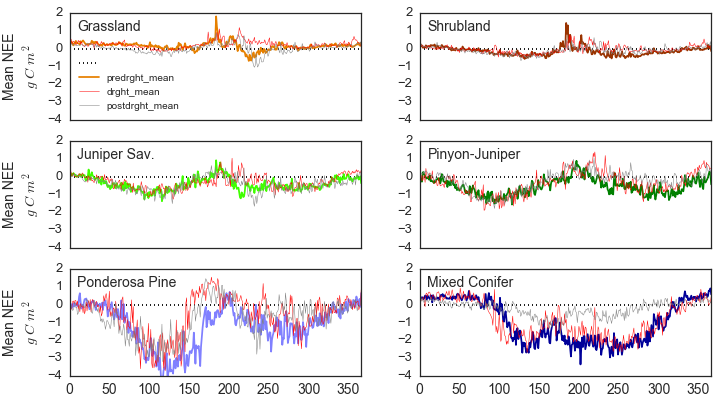

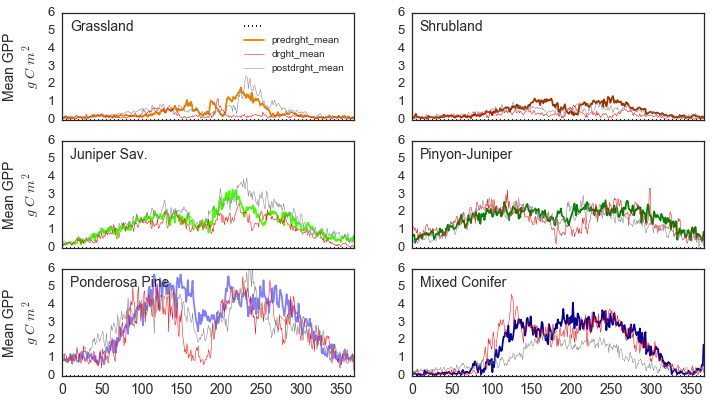

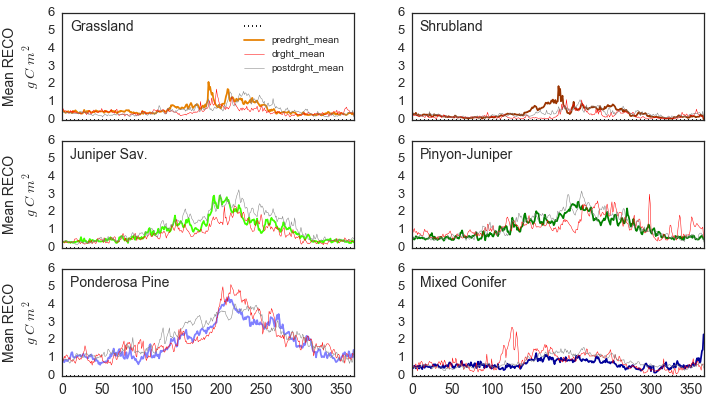

In [27]:
ylims = [ -4, 2 ]

figX = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
ax = plot_multiyr_mean_sites( fc_clim, ['predrght_mean','drght_mean','postdrght_mean'],
                             'NEE', 1, figX, ind_yrs=False,
                             ylims=ylims, hilite_yr=[None])
ax[0].legend(['','predrght_mean','drght_mean','postdrght_mean'], loc='lower left')

ylims = [ 0, 6 ]
figY = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
ax = plot_multiyr_mean_sites( gpp_clim, ['predrght_mean','drght_mean','postdrght_mean'],
                             'GPP', 5, figY, ind_yrs=False,
                             ylims=ylims, hilite_yr=[None])
ax[0].legend(['','predrght_mean','drght_mean','postdrght_mean'], loc='upper right')

figZ = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
ax = plot_multiyr_mean_sites( re_clim, ['predrght_mean','drght_mean','postdrght_mean'],
                             'RECO', 5, figZ, ind_yrs=False,
                             ylims=ylims, hilite_yr=[None])

ax[0].legend(['','predrght_mean','drght_mean','postdrght_mean'], loc='upper right')

## Plot mean daily values for all drought periods

### Limit to growing season

The next several plots are limited to growing season only.

In [7]:
startseas = 90
endseas = 300

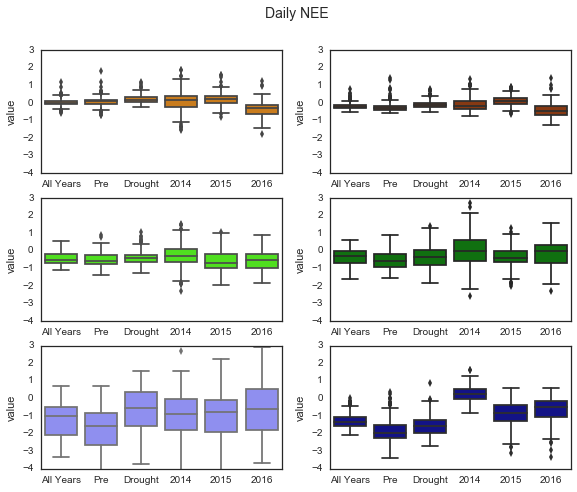

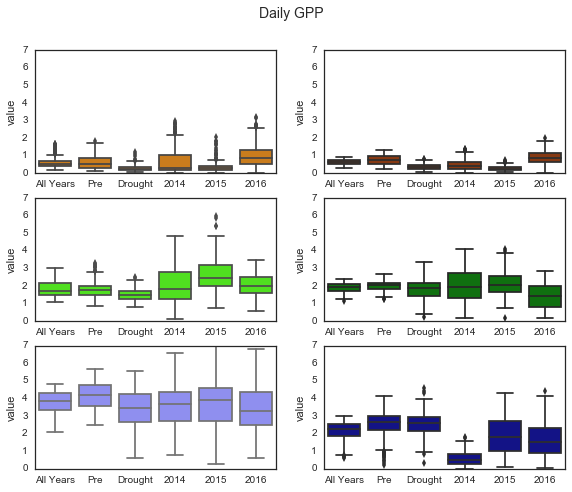

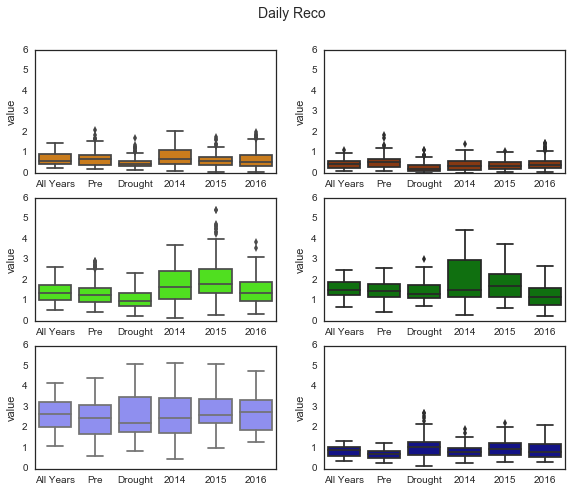

In [8]:
def plot_drought_dist( clim, fig, y_limit, anom=False, preanom=False ):
    for i, site in enumerate(sites):
        # Limit to growing season only
        data = clim[site].iloc[startseas:endseas]
        if anom:
            #subset = pd.melt(data[['predrght_mean_anom', 'drght_mean_anom',
            #                       'postdrght_mean_anom']])
            subset = pd.melt(data[['predrght_mean_anom', 'drght_mean_anom',
                                   '2014_anom', '2015_anom', '2016_anom']])
            xlabels = ['Pre', 'Drought', '2014', '2015', '2016']
        elif preanom:
            subset = pd.melt(data[['drght_mean_preanom',
                                   '2014_preanom', '2015_preanom', '2016_preanom']])
            xlabels = ['Drought', '2014', '2015', '2015', '2016']
        else:
            #subset = pd.melt(data[['allyr_mean','predrght_mean', 'drght_mean',
            #                       'postdrght_mean']])
            subset = pd.melt(data[['allyr_mean','predrght_mean', 'drght_mean',
                                   '2014', '2015', '2016']])
            xlabels = ['All Years', 'Pre', 'Drought', '2014', '2015','2016']
        
        ax = fig.add_subplot(len(clim.keys())/2, 2, i+1)    
        sns.boxplot(x='variable', y='value', data=subset, color=nmegplt.palette[site])
        ax.set_xlabel('')
        #ax.set_xticklabels(['Pre', 'Drought', 'Post'])
        ax.set_xticklabels(xlabels)
        ax.set_ylim(y_limit)

figX = plt.figure(figsize=( 9.5, 7.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_drought_dist( fc_clim, figX, [-4, 3])
plt.suptitle('Daily NEE', size=14)
    
figY = plt.figure(figsize=( 9.5, 7.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_drought_dist( gpp_clim, figY, [0, 7])
plt.suptitle('Daily GPP', size=14)

figZ = plt.figure(figsize=( 9.5, 7.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_drought_dist( re_clim, figZ, [0, 6])
plt.suptitle('Daily Reco', size=14)

## Anomalies w/ respect to all year mean

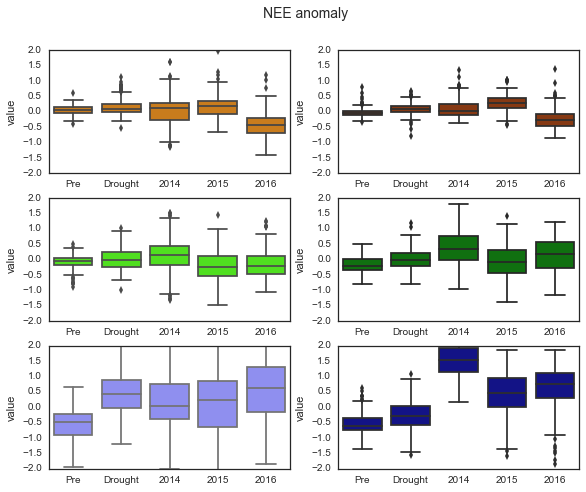

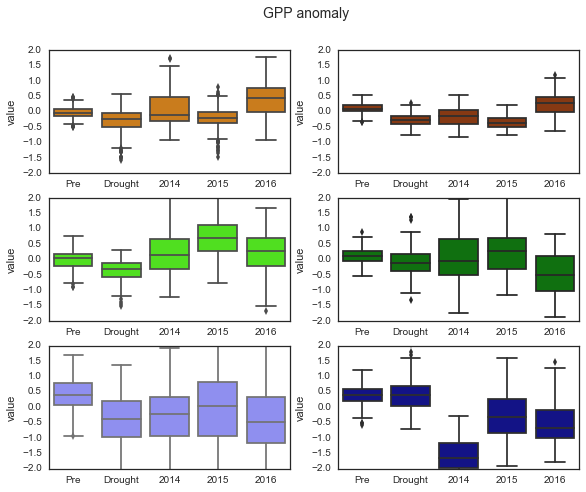

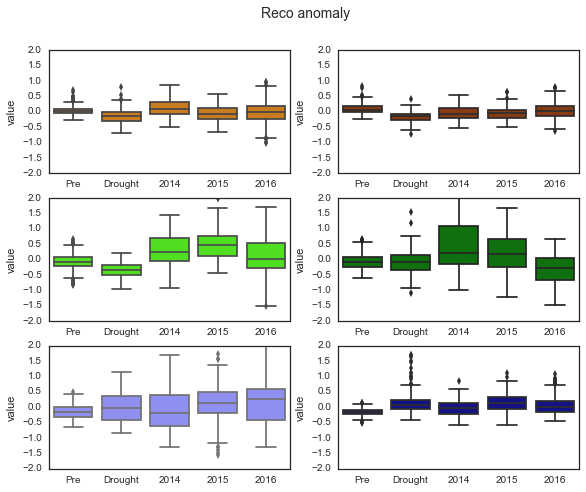

In [27]:
figX = plt.figure(figsize=( 9.5, 7.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_drought_dist( fc_clim, figX, [-2, 2], anom=True)
plt.suptitle('NEE anomaly', size=14)
    
figY = plt.figure(figsize=( 9.5, 7.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_drought_dist( gpp_clim, figY, [-2, 2], anom=True)
plt.suptitle('GPP anomaly', size=14)

figZ = plt.figure(figsize=( 9.5, 7.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_drought_dist( re_clim, figZ, [-2, 2], anom=True)
plt.suptitle('Reco anomaly', size=14)

## Anomalies w/ respect to pre-drought mean (2007-2010)

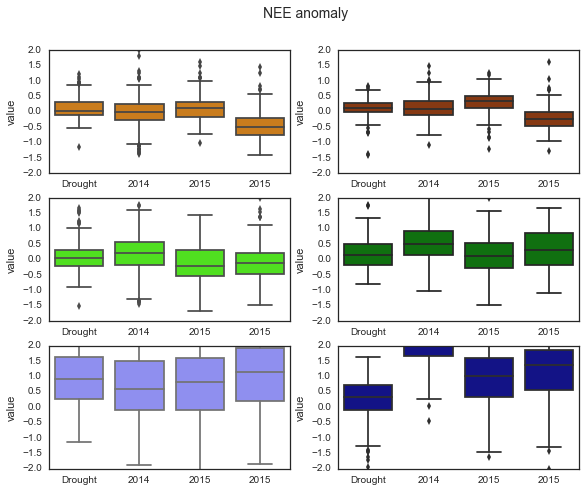

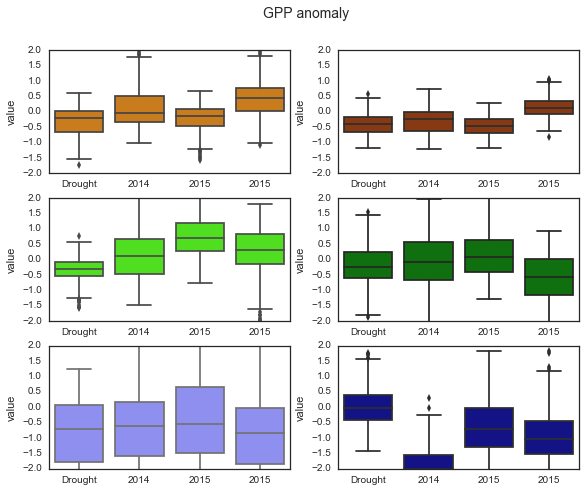

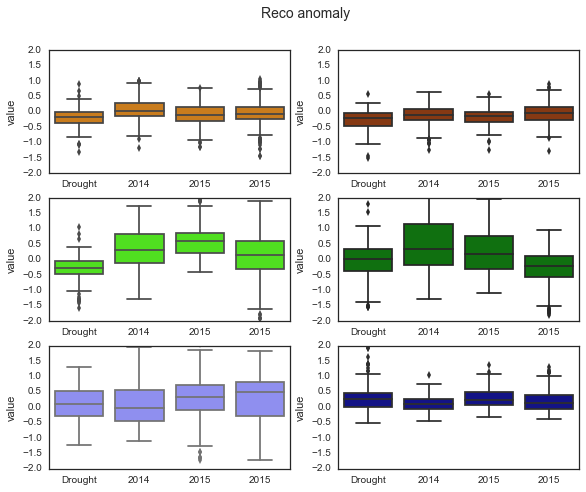

In [28]:
figX = plt.figure(figsize=( 9.5, 7.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_drought_dist( fc_clim, figX, [-2, 2], preanom=True)
plt.suptitle('NEE anomaly', size=14)
    
figY = plt.figure(figsize=( 9.5, 7.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_drought_dist( gpp_clim, figY, [-2, 2], preanom=True)
plt.suptitle('GPP anomaly', size=14)

figZ = plt.figure(figsize=( 9.5, 7.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_drought_dist( re_clim, figZ, [-2, 2], preanom=True)
plt.suptitle('Reco anomaly', size=14)

## Histograms/KDEs of daily flux values

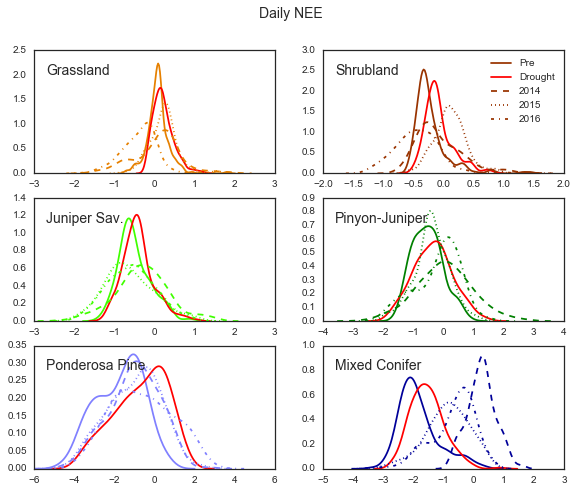

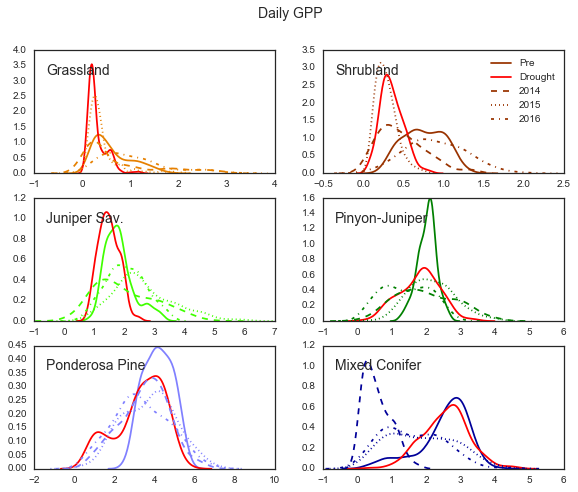

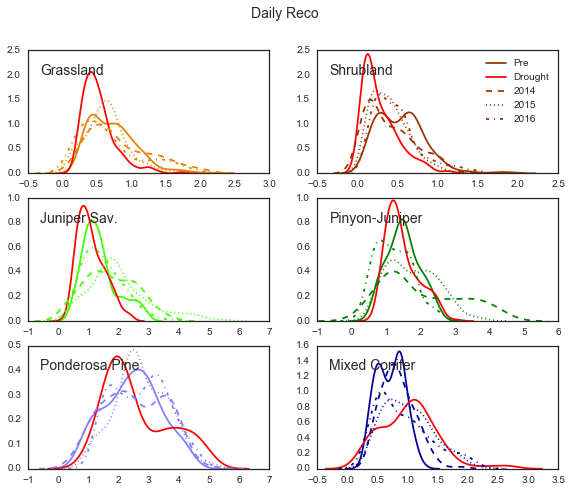

In [9]:
def plot_drought_kde( clim, fig, anom=False, preanom=False ):
    for i, site in enumerate(sites):
        # Limit to growing season only
        # linestyles '--' | '-.' | ':'
        data = clim[site].iloc[startseas:endseas]
        ax = fig.add_subplot(len(clim.keys())/2, 2, i+1)
        if anom:
            ax.set_xlim([-2, 2])
            kde_vars = ['predrght_mean_anom','drght_mean_anom','2014_anom','2015_anom' , '2016_anom']
            legend_label = ['Pre', 'Drought', '2014', '2015','2016']
        elif preanom:
            ax.set_xlim([-2, 2])
            kde_vars = ['drght_mean_preanom','2014_preanom','2015_preanom','2016_preanom']
            legend_label = ['Drought', '2014', '2015', '2016']
        else:
            #ax.set_xlim([-2, 2])
            kde_vars = ['predrght_mean','drght_mean','2014','2015','2016']
            legend_label = ['Pre', 'Drought', '2014', '2015','2016']
        
        if site!='Vcm' and preanom==False:
            sns.kdeplot(data[kde_vars[0]].dropna(), legend=False, color=nmegplt.palette[site])
            sns.kdeplot(data[kde_vars[1]].dropna(), legend=False, color='red')
            sns.kdeplot(data[kde_vars[2]].dropna(), legend=False, color=nmegplt.palette[site], ls='--')
            sns.kdeplot(data[kde_vars[3]].dropna(), legend=False, color=nmegplt.palette[site], ls=':')
            sns.kdeplot(data[kde_vars[4]].dropna(), legend=False, color=nmegplt.palette[site], ls='-.')
        elif site!='Vcm' and preanom==True:
            sns.kdeplot(data[kde_vars[0]].dropna(), legend=False, color='red')
            sns.kdeplot(data[kde_vars[1]].dropna(), legend=False, color=nmegplt.palette[site])
            sns.kdeplot(data[kde_vars[2]].dropna(), legend=False, color=nmegplt.palette[site], ls='--')
            sns.kdeplot(data[kde_vars[3]].dropna(), legend=False, color=nmegplt.palette[site], ls=':')
        elif site=='Vcm' and preanom==False:
            sns.kdeplot(data[kde_vars[0]].dropna(), legend=False, color=nmegplt.palette[site])
            sns.kdeplot(data[kde_vars[1]].dropna(), legend=False, color='red')
            sns.kdeplot(data[kde_vars[2]].dropna(), legend=False, color=nmegplt.palette[site], ls='--')
            sns.kdeplot(data[kde_vars[3]].dropna(), legend=False, color=nmegplt.palette[site], ls=':')
            sns.kdeplot(data[kde_vars[4]].dropna(), legend=False, color=nmegplt.palette[site], ls='-.')
        elif site=='Vcm' and preanom==True:
            sns.kdeplot(data[kde_vars[0]].dropna(), legend=False, color='red')
            sns.kdeplot(data[kde_vars[1]].dropna(), legend=False, color=nmegplt.palette[site])
            sns.kdeplot(data[kde_vars[2]].dropna(), legend=False, color=nmegplt.palette[site], ls='--')
            sns.kdeplot(data[kde_vars[3]].dropna(), legend=False, color=nmegplt.palette[site], ls=':')
        
        plt.text( .05, .8, nmegplt.longnames[site], size=14, transform=ax.transAxes  )
        ax.set_xlabel('')
        if i==1:
            #plt.legend(['Pre', 'Post', 'Drought'])
            plt.legend(legend_label)
        
figX = plt.figure(figsize=( 9.5, 7.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_drought_kde(fc_clim, figX)
plt.suptitle('Daily NEE', size=14)
figX.savefig( fig_path + 'KDE_NEE_flux.png')
    
figY = plt.figure(figsize=( 9.5, 7.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_drought_kde(gpp_clim, figY)
plt.suptitle('Daily GPP', size=14)
figY.savefig( fig_path + 'KDE_GPP_flux.png')

figZ = plt.figure(figsize=( 9.5, 7.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_drought_kde(re_clim, figZ)
plt.suptitle('Daily Reco', size=14)
figZ.savefig( fig_path + 'KDE_RECO_flux.png')

## Histograms/KDEs of daily anomaly (wrt all years)

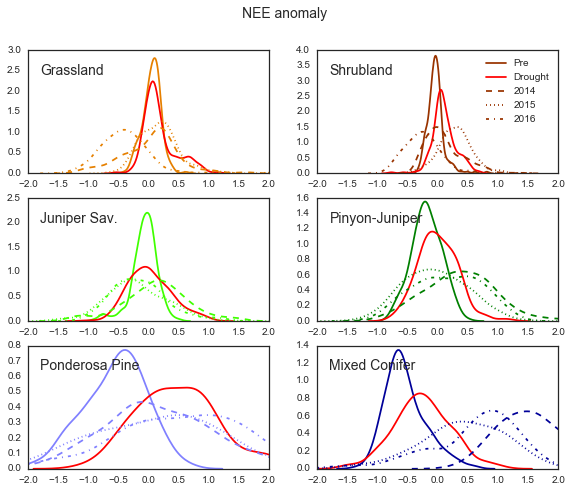

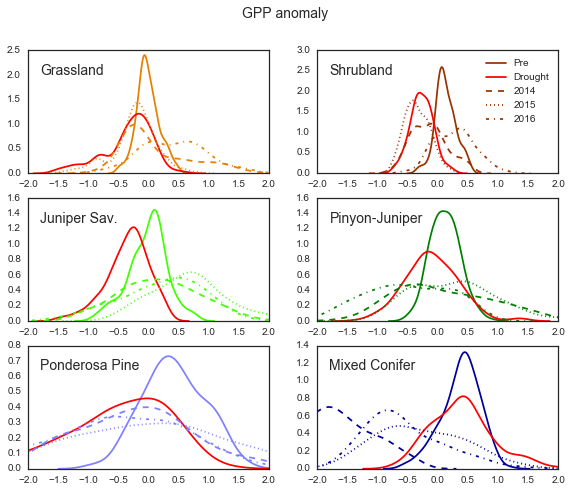

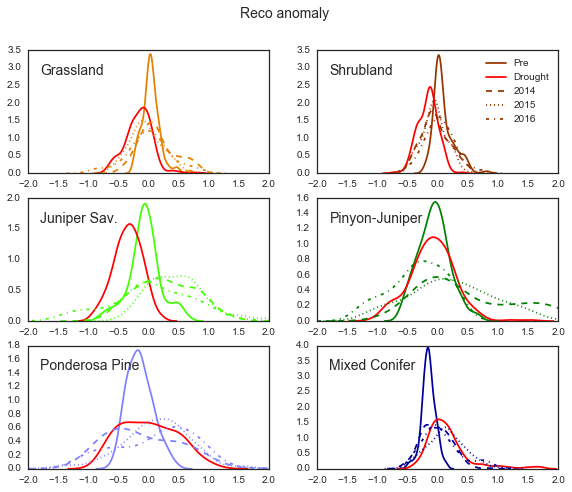

In [133]:
figX = plt.figure(figsize=( 9.5, 7.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_drought_kde(fc_clim, figX, anom=True)
plt.suptitle('NEE anomaly', size=14)
figX.savefig( fig_path + 'KDE_NEE_fluxanom_allyr.png')
    
figY = plt.figure(figsize=( 9.5, 7.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_drought_kde(gpp_clim, figY, anom=True)
plt.suptitle('GPP anomaly', size=14)
figY.savefig( fig_path + 'KDE_GPP_fluxanom_allyr.png')

figZ = plt.figure(figsize=( 9.5, 7.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_drought_kde(re_clim, figZ, anom=True)
plt.suptitle('Reco anomaly', size=14)
figZ.savefig( fig_path + 'KDE_RECO_fluxanom_allyr.png')

## Histograms/KDEs of daily anomaly (wrt pre-drought years)

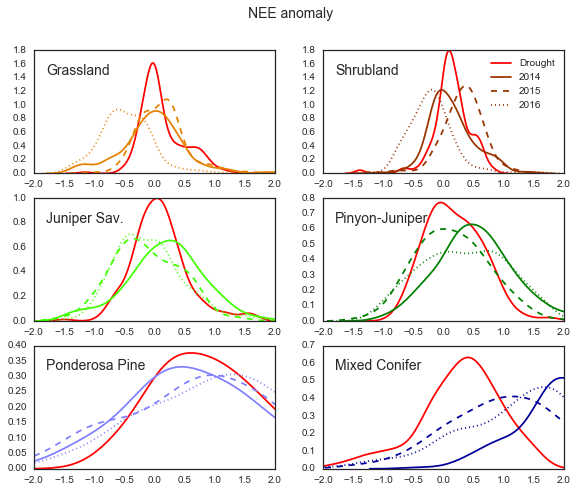

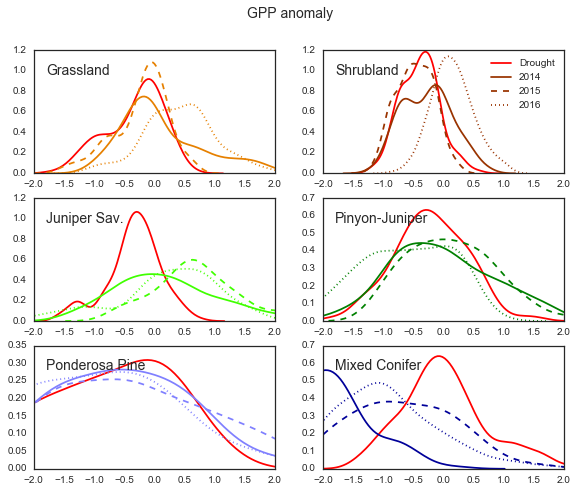

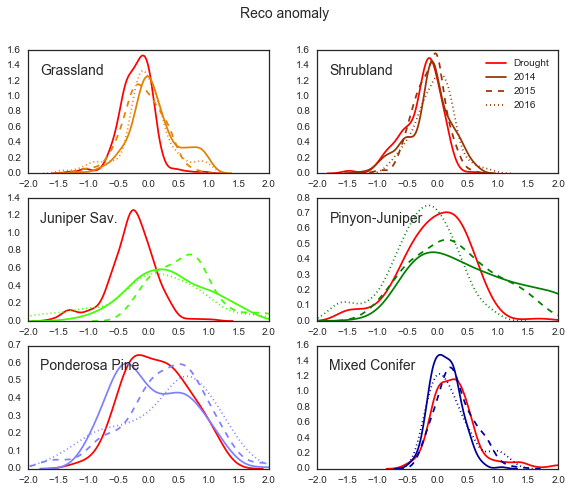

In [134]:
figX = plt.figure(figsize=( 9.5, 7.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_drought_kde(fc_clim, figX, preanom=True)
plt.suptitle('NEE anomaly', size=14)
figZ.savefig( fig_path + 'KDE_NEE_fluxanom_predrght.png')

figY = plt.figure(figsize=( 9.5, 7.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_drought_kde(gpp_clim, figY, preanom=True)
plt.suptitle('GPP anomaly', size=14)
figZ.savefig( fig_path + 'KDE_GPP_fluxanom_predrght.png')

figZ = plt.figure(figsize=( 9.5, 7.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_drought_kde(re_clim, figZ, preanom=True)
plt.suptitle('Reco anomaly', size=14)
figZ.savefig( fig_path + 'KDE_RECO_fluxanom_predrght.png')

## Table of cumulative values

* Summed g C/m2 during the different periods we are interested in (pre-, post-, drought, and all year means)
* Differences between pre-drought/potential cumulative values and and drought/post-drought periods
* Percentage of pre-drought and potential cumulative flux


In [57]:
indices = ['AllYr Mean', 'Pre','Drought', 'Post', 'Potential', 
           'Pre-Drought', 'Drought % of pre', 'Pre-Post','Post % of pre',
           'Pot.-Drought', 'Drought % of pot.', 'Pot.-Post', 'Post % of pot.']
nee_t = pd.DataFrame(columns=sites, index = indices)
gpp_t = pd.DataFrame(columns=sites, index = indices)
reco_t = pd.DataFrame(columns=sites, index = indices)

for i, site in enumerate(sites):
        
    # Sum up the climatology columns for the site
    sums = fc_clim[site].sum()
    nee_t[site].loc['AllYr Mean'] = sums.allyr_mean
    nee_t[site].loc['Pre'] = sums.predrght_mean
    nee_t[site].loc['Drought'] = sums.drght_mean
    nee_t[site].loc['Post'] = sums.postdrght_mean
    nee_t[site].loc['Pre-Drought'] = sums.predrght_mean - sums.drght_mean
    nee_t[site].loc['Drought % of pre'] = (sums.drght_mean / sums.predrght_mean) * 100
    nee_t[site].loc['Pre-Post'] = sums.predrght_mean - sums.postdrght_mean
    nee_t[site].loc['Post % of pre'] = (sums.postdrght_mean / sums.predrght_mean) * 100
    
    sums = gpp_clim[site].sum()
    gpp_t[site].loc['AllYr Mean'] = sums.allyr_mean
    gpp_t[site].loc['Pre'] = sums.predrght_mean
    gpp_t[site].loc['Drought'] = sums.drght_mean
    gpp_t[site].loc['Post'] = sums.postdrght_mean
    gpp_t[site].loc['Pre-Drought'] = sums.predrght_mean - sums.drght_mean
    gpp_t[site].loc['Drought % of pre'] = (sums.drght_mean / sums.predrght_mean) * 100
    gpp_t[site].loc['Pre-Post'] = sums.predrght_mean - sums.postdrght_mean
    gpp_t[site].loc['Post % of pre'] = (sums.postdrght_mean / sums.predrght_mean) * 100
    
    sums = re_clim[site].sum()
    reco_t[site].loc['AllYr Mean'] = sums.allyr_mean
    reco_t[site].loc['Pre'] = sums.predrght_mean
    reco_t[site].loc['Drought'] = sums.drght_mean
    reco_t[site].loc['Post'] = sums.postdrght_mean
    reco_t[site].loc['Pre-Drought'] = sums.predrght_mean - sums.drght_mean
    reco_t[site].loc['Drought % of pre'] = (sums.drght_mean / sums.predrght_mean) * 100
    reco_t[site].loc['Pre-Post'] = sums.predrght_mean - sums.postdrght_mean
    reco_t[site].loc['Post % of pre'] = (sums.postdrght_mean / sums.predrght_mean) * 100
    
nee_t

,Seg,Ses,Wjs,Mpj,Vcp,Vcm
AllYr Mean,38.7953,-38.8531,-128.705,-138.016,-318.207,-243.518
Pre,55.5415,-49.4018,-148.383,-194.566,-424.317,-344.562
Drought,85.4177,-13.3636,-110.956,-131.498,-196.374,-295.361
Post,4.77258,-35.0583,-161.249,-96.8939,-275.868,-84.1578
Potential,NaN,NaN,NaN,NaN,NaN,NaN
Pre-Drought,-29.8762,-36.0382,-37.4274,-63.0683,-227.943,-49.2016
Drought % of pre,153.791,27.0509,74.7765,67.5852,46.2801,85.7206
Pre-Post,50.769,-14.3435,12.8663,-97.6726,-148.449,-260.405
Post % of pre,8.59282,70.9657,108.671,49.7999,65.0145,24.4245
Pot.-Drought,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
gpp_t

,Seg,Ses,Wjs,Mpj,Vcp,Vcm
AllYr Mean,163.557,162.636,492.253,567.414,1057.5,508.309
Pre,158.646,190.086,496.257,602.012,1123.86,584.482
Drought,86.0587,99.547,399.091,560.864,942.552,590.328
Post,192.635,161.284,589.737,548.717,1048.74,365.352
Potential,NaN,NaN,NaN,NaN,NaN,NaN
Pre-Drought,72.5869,90.5394,97.1663,41.1487,181.304,-5.84582
Drought % of pre,54.2459,52.3694,80.4202,93.1648,83.8677,101
Pre-Post,-33.9889,28.8028,-93.4804,53.2955,75.1176,219.13
Post % of pre,121.424,84.8475,118.837,91.1471,93.3161,62.5086
Pot.-Drought,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
reco_t

,Seg,Ses,Wjs,Mpj,Vcp,Vcm
AllYr Mean,202.353,123.783,366.561,429.398,741.524,264.791
Pre,214.187,140.685,353.085,407.446,699.539,239.92
Drought,171.476,86.1834,288.135,429.365,746.178,294.967
Post,197.407,126.225,428.488,451.823,772.871,281.194
Potential,NaN,NaN,NaN,NaN,NaN,NaN
Pre-Drought,42.7107,54.5012,64.95,-21.9196,-46.6386,-55.0474
Drought % of pre,80.0592,61.26,81.605,105.38,106.667,122.944
Pre-Post,16.78,14.4593,-75.4031,-44.3771,-73.3318,-41.2744
Post % of pre,92.1657,89.7222,121.355,110.892,110.483,117.203
Pot.-Drought,NaN,NaN,NaN,NaN,NaN,NaN


## Pre-Post-During Drought calculations

In [32]:
clim[1].allyr_mean

NameError: name 'clim' is not defined

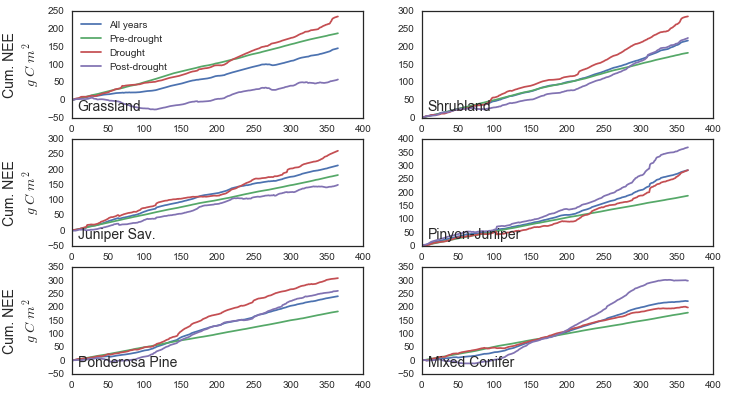

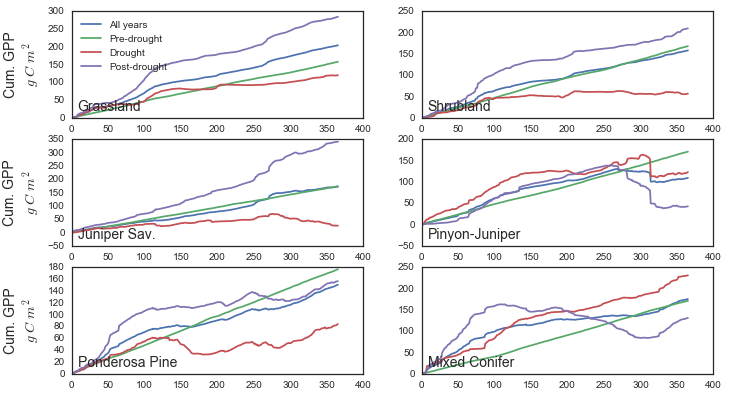

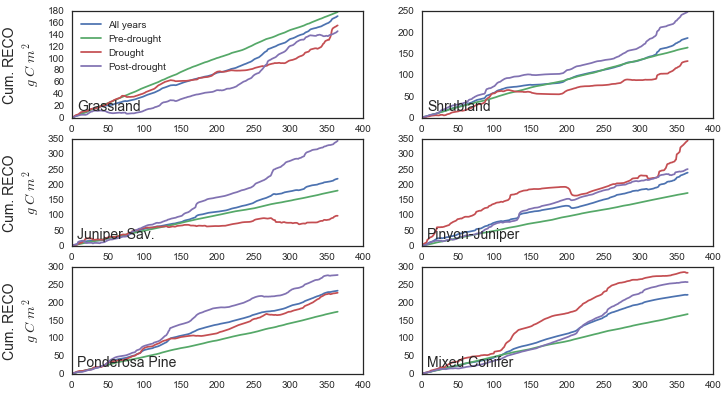

In [35]:
def plot_cumulative_drought( clim, fig, label, norm=False):
    ax = list();
    for i, site in enumerate(sites):
        if norm:
            # This isn't giving us what we need for cumulative normalized values
            ax.append(fig.add_subplot(len(sites)/2, 2, i+1))
            plt.plot( clim[site].index,  np.cumsum(clim[site].allyr_mean_norm))
            plt.plot( clim[site].index,  np.cumsum(clim[site].predrght_mean_norm))
            plt.plot( clim[site].index,  np.cumsum(clim[site].drght_mean_norm))
            plt.plot( clim[site].index,  np.cumsum(clim[site].postdrght_mean_norm))  
        else:
            ax.append(fig.add_subplot(len(sites)/2, 2, i+1))
            plt.plot( clim[site].index,  np.cumsum(clim[site].allyr_mean))
            plt.plot( clim[site].index,  np.cumsum(clim[site].predrght_mean))
            plt.plot( clim[site].index,  np.cumsum(clim[site].drght_mean))
            plt.plot( clim[site].index,  np.cumsum(clim[site].postdrght_mean))
            
            
        #plt.xlim( xlims )
        plt.text( .02, .07, nmegplt.longnames[site], size=14, transform=ax[i].transAxes )
        if i==0:
            plt.legend(['All years', 'Pre-drought', 'Drought','Post-drought'], loc='upper left')

    for i in (0, 2, 4):
            ax[i].set_ylabel('Cum. {0}\n$g\ C\ m^2$'.format(label), fontsize=14)
            
            
figX = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_cumulative_drought( fc_clim, figX, 'NEE',norm=True )
figX.savefig( fig_path + 'cumulative_drought_NEE' + '.png' )

figY = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_cumulative_drought( gpp_clim, figY, 'GPP' ,norm=True)
figY.savefig( fig_path + 'cumulative_drought_GPP'+ '.png' )

figZ = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_cumulative_drought( re_clim, figZ, 'RECO',norm=True )
figZ.savefig( fig_path + 'cumulative_drought_RECO' + '.png' )



In [56]:
p_clim['Mpj'].columns
p_clim[ 'Mpj']

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,...,2012_anom,2012_preanom,2013_anom,2013_preanom,2014_anom,2014_preanom,2015_anom,2015_preanom,2016_anom,2016_preanom
1,NaN,0.00000,0.00000,0.80061,0.0,0.0,0.0,0.000,0.7,0.0,...,-0.400061,-0.266870,-0.400061,-0.266870,-0.400061,-0.266870,0.299939,0.433130,-0.400061,-0.266870
2,NaN,0.00000,0.00000,0.00000,4.8,0.0,0.0,0.000,0.4,1.1,...,-0.670000,0.000000,-0.670000,0.000000,-0.670000,0.000000,-0.270000,0.400000,0.430000,1.100000
3,NaN,0.00000,0.00000,0.00000,0.8,0.0,0.0,0.000,0.0,0.0,...,-0.080000,0.000000,-0.080000,0.000000,-0.080000,0.000000,-0.080000,0.000000,-0.080000,0.000000
4,NaN,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.000,1.9,0.0,...,-0.190000,0.000000,-0.190000,0.000000,-0.190000,0.000000,1.710000,1.900000,-0.190000,0.000000
5,NaN,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.000,0.9,3.3,...,-0.420000,0.000000,-0.420000,0.000000,-0.420000,0.000000,0.480000,0.900000,2.880000,3.300000
6,NaN,0.90069,0.40031,0.00000,0.0,0.0,0.0,0.000,0.0,1.8,...,-0.600100,-0.433667,-0.600100,-0.433667,-0.600100,-0.433667,-0.600100,-0.433667,1.199900,1.366333
7,NaN,9.80745,0.00000,0.00000,0.0,0.0,0.0,0.000,0.0,3.5,...,-1.420745,-3.269150,-1.420745,-3.269150,-1.420745,-3.269150,-1.420745,-3.269150,2.079255,0.230850
8,NaN,4.30328,0.00000,0.00000,0.0,0.0,0.0,0.000,0.1,0.3,...,-0.500328,-1.434427,-0.500328,-1.434427,-0.500328,-1.434427,-0.400328,-1.334427,-0.200328,-1.134427
9,NaN,0.00000,0.00000,0.00000,0.0,1.7,0.0,0.000,0.0,1.4,...,1.390000,1.700000,-0.310000,0.000000,-0.310000,0.000000,-0.310000,0.000000,1.090000,1.400000
10,NaN,0.00000,5.50418,0.00000,0.0,0.0,0.0,0.000,0.0,0.0,...,-0.550418,-1.834727,-0.550418,-1.834727,-0.550418,-1.834727,-0.550418,-1.834727,-0.550418,-1.834727


## Plot monthly mean anomalies

In [74]:
d.Mpj.columns

Index(['GPP_g_int', 'RECO_g_int', 'FC_F_g_int', 'FC_F_g_nightint',
       'FC_F_g_dayint', 'ET_mm_24hint_0', 'P_F_sum', 'TA_F_avg', 'RH_F_avg',
       'SW_IN_F_avg', 'NETRAD_F_avg', 'VPD_F_avg', 'PPFD_IN_avg', 'LE_F_avg',
       'H_F_avg', 'LE_F_int', 'H_F_int', 'TA_F_min', 'VPD_F_min', 'TA_F_max',
       'VPD_F_max', 'ET_mm_dayint', 'PET_mm_dayint'],
      dtype='object')

In [81]:
p_anom = { s : tr.var_anomaly( d[s].P_F_sum ) for s in sites}
vpd_anom = { s : tr.var_anomaly( d[s].VPD_F_avg ) for s in sites}
fc_anom = { s : tr.var_anomaly( d[s].FC_F_g_int) for s in sites}
gpp_anom = { s : tr.var_anomaly( d[s].GPP_g_int ) for s in sites}
re_anom= { s : tr.var_anomaly( d[s].RECO_g_int ) for s in sites}

fc_anom_n = { s : tr.var_anomaly( d[s].FC_F_g_int, norm=True ) for s in sites}
gpp_anom_n = { s : tr.var_anomaly( d[s].GPP_g_int, norm=True ) for s in sites}
re_anom_n = { s : tr.var_anomaly( d[s].RECO_g_int, norm=True ) for s in sites}


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


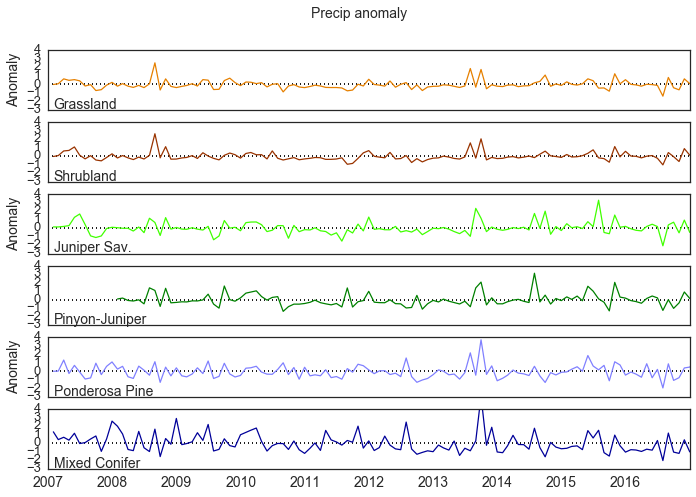

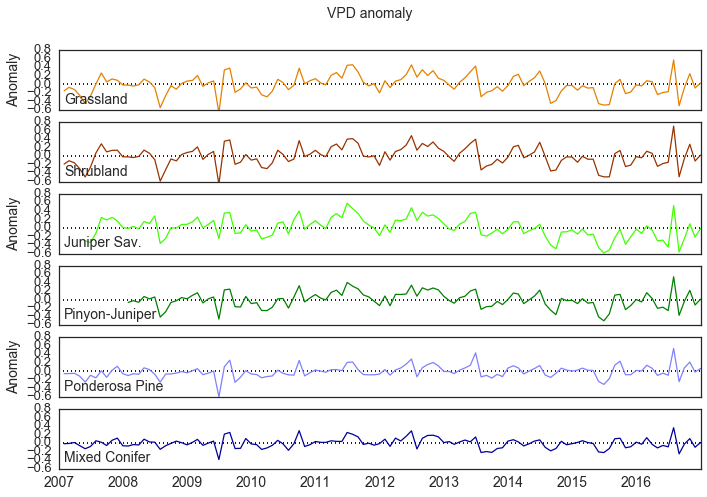

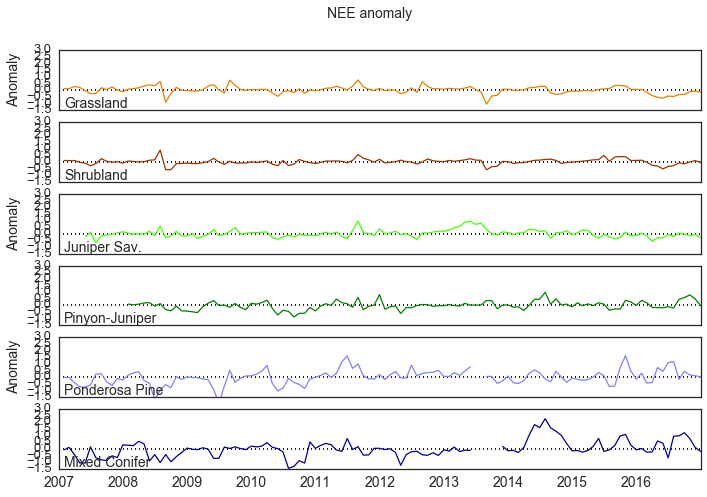

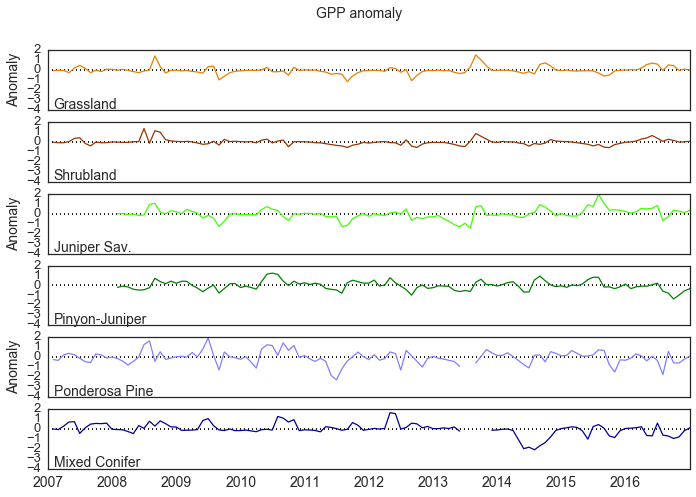

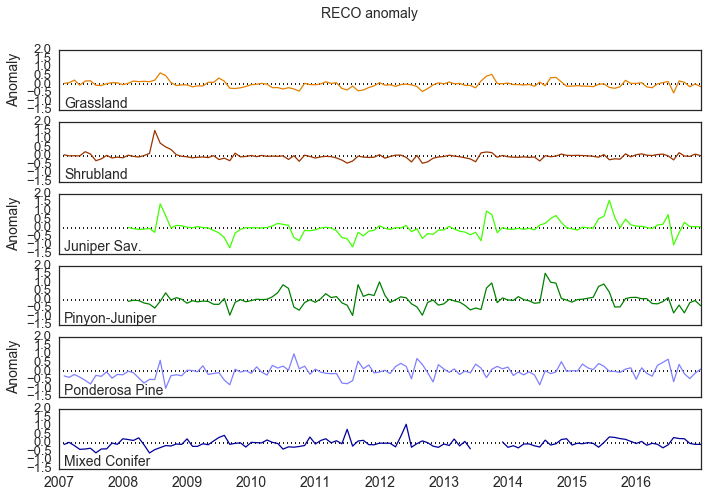

In [127]:
xlims = [ dt.datetime( 2007, 1, 1 ), dt.datetime( 2017, 9, 1 )]

varlist = ['P_F','VPD_F','NEE_g_int','GPP_g_int','RECO_g_int']
ylabs = ['Precip anomaly', 'VPD anomaly', 'NEE anomaly', 'GPP anomaly', 'RECO anomaly']
ylims = [[-3, 4],[-0.6,0.8],[-1.5,3],[-4,2],[-1.5,2]]


for i, anom in enumerate([p_anom, vpd_anom, fc_anom, gpp_anom, re_anom]):
    # Resample anomaly to monthly mean
    anom_m = { i : anom[i].resample('1M', how='mean') for i in anom.keys() }
    
    fig = plt.figure(figsize=( 11.5, 7.5 ), dpi=150, facecolor='w', edgecolor='k')
    nmegplt.plot_tseries( anom_m, varlist[i], ylims[i][0]+0.15, fig, 'Anomaly', ylims=ylims[i])
    plt.suptitle(ylabs[i], size=14)
    
    fig.savefig( fig_path + 'mean_'+ ylabs[i]+ '.png' )


## Plot monthly mean normalized C flux anomaly

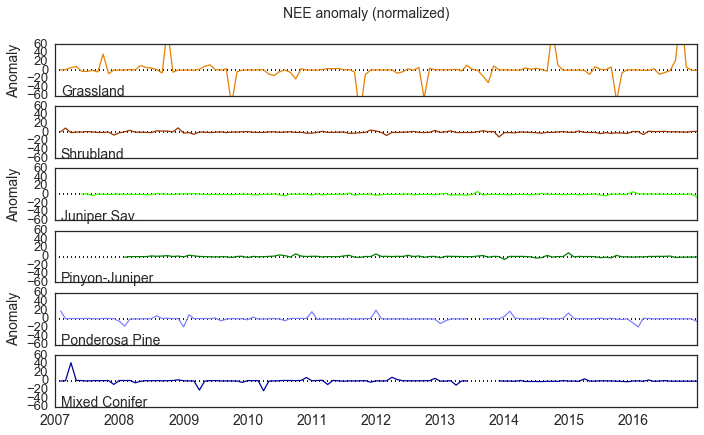

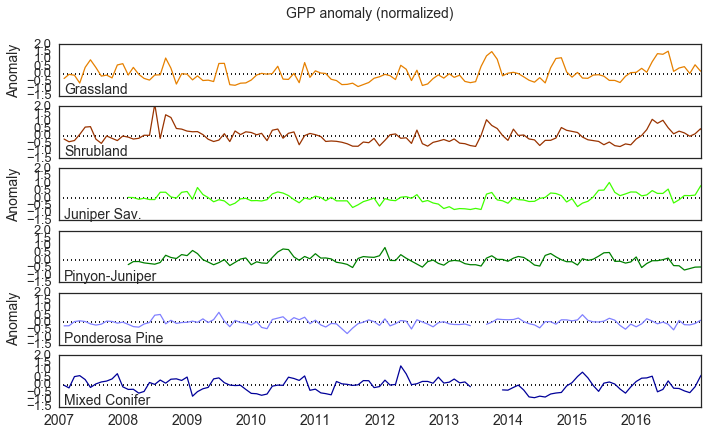

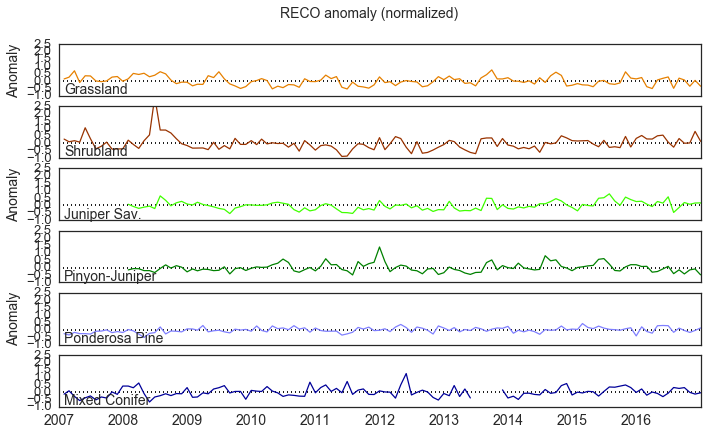

In [125]:
varlist = ['NEE_g_int','GPP_g_int','RECO_g_int']
ylabs = ['NEE anomaly', 'GPP anomaly', 'RECO anomaly']
ylims = [[-60,60],[-1.5,2],[-1,2.5]]

for i, anom in enumerate([fc_anom_n, gpp_anom_n, re_anom_n]):
    
    anom_m = { i : anom[i].resample('1M').mean() for i in anom.keys() }
    
    fig = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
    nmegplt.plot_tseries( anom_m, varlist[i], ylims[i][0]+0.15, fig, 'Anomaly', ylims=ylims[i])
    plt.suptitle(ylabs[i] + ' (normalized)', size=14)
    
    fig.savefig( fig_path + 'mean_norm_'+ ylabs[i]+ '.png')
    
    


In [85]:
p_anom

{'Mpj': 2007-01-01   NaN
 2007-01-02   NaN
 2007-01-03   NaN
 2007-01-04   NaN
 2007-01-05   NaN
 2007-01-06   NaN
 2007-01-07   NaN
 2007-01-08   NaN
 2007-01-09   NaN
 2007-01-10   NaN
 2007-01-11   NaN
 2007-01-12   NaN
 2007-01-13   NaN
 2007-01-14   NaN
 2007-01-15   NaN
 2007-01-16   NaN
 2007-01-17   NaN
 2007-01-18   NaN
 2007-01-19   NaN
 2007-01-20   NaN
 2007-01-21   NaN
 2007-01-22   NaN
 2007-01-23   NaN
 2007-01-24   NaN
 2007-01-25   NaN
 2007-01-26   NaN
 2007-01-27   NaN
 2007-01-28   NaN
 2007-01-29   NaN
 2007-01-30   NaN
               ..
 2017-12-03   NaN
 2017-12-04   NaN
 2017-12-05   NaN
 2017-12-06   NaN
 2017-12-07   NaN
 2017-12-08   NaN
 2017-12-09   NaN
 2017-12-10   NaN
 2017-12-11   NaN
 2017-12-12   NaN
 2017-12-13   NaN
 2017-12-14   NaN
 2017-12-15   NaN
 2017-12-16   NaN
 2017-12-17   NaN
 2017-12-18   NaN
 2017-12-19   NaN
 2017-12-20   NaN
 2017-12-21   NaN
 2017-12-22   NaN
 2017-12-23   NaN
 2017-12-24   NaN
 2017-12-25   NaN
 2017-12-26   NaN
 20

In [112]:
texty = 20
figX = plt.figure()

x_anoms = [vpd_anom, p_anom]
x_labels = ['VPD_F_avg', 'P_F_sum']
y_anoms = [fc_anom, gpp_anom, re_anom]
y_labels = [ 'FC_F_g_int', 'GPP_g_int', 'RECO_g_int']


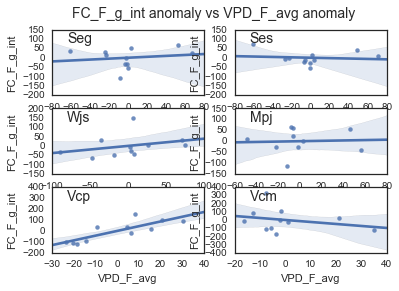

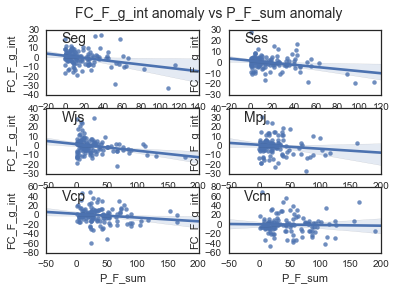

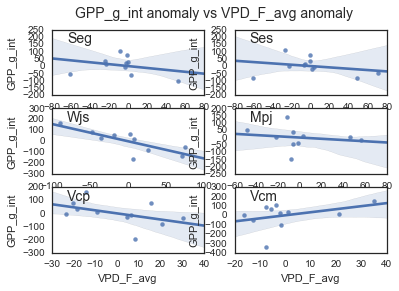

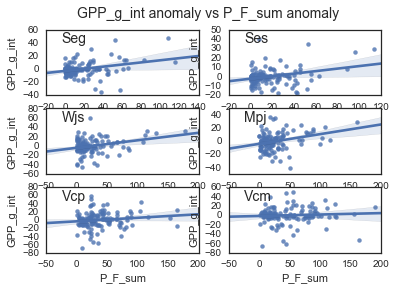

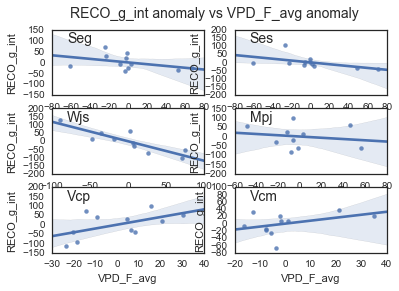

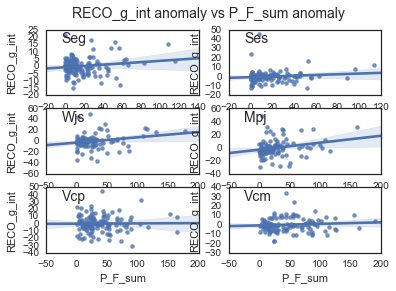

In [123]:


for i in range(0, 3):
    figA = plt.figure()
    x_anom = x_anoms[0]
    y_anom = y_anoms[i]
    
    for j, site in enumerate(sites):
        x_y_anom = x_anom[ site ].resample('A').sum()
        y_y_anom = y_anom[ site ].resample('A').sum()
        df = pd.concat([x_y_anom, y_y_anom], axis=1)
        ax = figA.add_subplot(3, 2, j+1)
        sns.regplot(x_labels[0], y_labels[i], df)
        plt.text( .1, .8, sites[j], size=14, transform = ax.transAxes  )
    plt.suptitle( y_labels[i] + ' anomaly vs ' + x_labels[0] + ' anomaly', size=14)
    
    figB = plt.figure()
    x_anom = x_anoms[1]
    
    
    for k, site in enumerate(sites):
        # Yearly summed precip
        x_y_anom = d[ site ].P_F_sum.resample('M').sum()
        # Yearly summed precip anomaly
        #x_y_anom = x_anom[ site ].resample('M',how='sum')
        y_y_anom = y_anom[ site ].resample('M').sum()
        y_y_anom = y_y_anom.shift(-1)
        
        df = pd.concat([x_y_anom, y_y_anom], axis=1)
        ax = figB.add_subplot(3, 2, k+1)
        sns.regplot(x_labels[1], y_labels[i], df)
        plt.text( .1, .8, sites[k], size=14, transform = ax.transAxes  )
    plt.suptitle( y_labels[i] + ' anomaly vs ' + x_labels[1] + ' anomaly', size=14)
    
    figA.savefig( fig_path + x_labels[0] + y_labels[i] + '.png')
    figB.savefig( fig_path +  x_labels[1] + y_labels[i] + '.png')
